# Analysis of *The Office*

In [2]:
import pandas as pd

In [3]:
office_data = pd.read_csv("the_office_lines_scripts.csv")

In [15]:
office_data.shape

(59909, 7)

In [5]:
office_data.head()

,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
2,3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False


## How many characters are there? What are their names?

In [84]:
total_number_of_line = len(office_data.speaker)
character_names = list(office_data.speaker.apply(lambda x: x.lower().capitalize()).unique())
num_of_characters = len(character_names)
print(f"There are {num_of_characters} characters, whose names are {character_names}")

There are 778 characters, whose names are ['Michael', 'Jim', 'Pam', 'Dwight', 'Jan', 'Michel', 'Todd packer', 'Phyllis', 'Stanley', 'Oscar', 'Angela', 'Kevin', 'Ryan', 'Man', 'Roy', 'Documentary crew member', 'Mr. brown', 'Toby', 'Kelly', 'Meredith', 'Travel agent', 'Man on phone', 'Everybody', 'Lonny', 'Darryl', 'Teammates', 'Michael and dwight', 'Warehouse worker', 'Madge', 'Worker', 'Packer', 'Katy', 'Guy at bar', 'Other guy at bar', 'Pam and jim', 'Employee', "Chili's employee", 'Waitress', 'Manager', "Kevin's computer", 'Warehouse guy', 'Warehouse guys', 'Video', 'Man in video', 'Actor', 'Redheaded actress', "Mr. o'malley", 'Albiny', "Pam's mom", 'Carol', 'Bill', 'Everyone', 'Crowd', 'Song', 'Dwight and michael', 'Sherri', 'Creed', 'Devon', 'Children', 'Kid', 'Vance refrigeration worker #1', 'Vance refrigeration worker #2', 'Hank the security guard', 'Ira', "Ryan's voicemail", 'Master', 'Alyssa', 'Christian', 'Hostess', 'Michael and christian', 'Sadiq (it guy)', 'Mark', 'Improv te

## For each character, find out who has the most lines across all episodes

In [14]:
from collections import Counter
characters_to_num_of_lines = Counter(office_data.speaker)
maximum_num_of_lines = max(characters_to_num_of_lines.values())
for character, num_of_lines in characters_to_num_of_lines.items():
    if num_of_lines == maximum_num_of_lines:
        print(f"{character} has the most lines across all episodes, with {maximum_num_of_lines} number of lines")

Michael has the most lines across all episodes, with 12140 number of lines


## What is the average of words per line for each character?

In [36]:
from collections import defaultdict
character_to_lines = defaultdict(list)
office_data.apply(lambda x: character_to_lines[x.speaker].append(x.line_text), axis=1)
character_to_avg_words_per_line = defaultdict(lambda : 0)
for character, lines in character_to_lines.items():
    if len(lines) == 0:
        raise "error: lines of len 0"
    # rounded to integer
    character_to_avg_words_per_line[character] = int(sum(map(lambda x: len(x), lines)) / len(lines))

In [37]:
list(character_to_avg_words_per_line.items())[:5]

[('Michael', 77), ('Jim', 52), ('Pam', 49), ('Dwight', 65), ('Jan', 55)]

## What is the most common word per character?

In [38]:
character_to_word_freq = dict()
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
for character, lines in character_to_lines.items():
    all_lines = " ".join(lines)
    for punc in punctuations:
        all_lines = all_lines.replace(punc, " ")
    word_freq = Counter(all_lines.split())
    character_to_word_freq[character] = word_freq 

In [41]:
character_to_most_common_word = dict()
for character, word_freq in character_to_word_freq.items():
    maximum_freq = max(word_freq.values())
    most_common_word = None
    # assume only one most common word 
    for word, freq in word_freq.items():
        if freq == maximum_freq:
            most_common_word = word
            break 
    if not most_common_word:
        raise "error: not found most common word"
    character_to_most_common_word[character] = most_common_word

In [42]:
character_to_most_common_word

{'Michael': 'I',
 'Jim': 'I',
 'Pam': 'I',
 'Dwight': 'I',
 'Jan': 'I',
 'Michel': 'I',
 'Todd Packer': 'I',
 'Phyllis': 'I',
 'Stanley': 'I',
 'Oscar': 'I',
 'Angela': 'I',
 'Kevin': 'I',
 'Ryan': 'I',
 'Man': 'I',
 'Roy': 'I',
 'Documentary Crew Member': 'you',
 'Mr. Brown': 'you',
 'Toby': 'I',
 'Kelly': 'I',
 'Meredith': 'I',
 'Travel Agent': 'know',
 'Man on Phone': 'the',
 'Everybody': 'Happy',
 'Lonny': 's',
 'Darryl': 'I',
 'Teammates': 'Yeah',
 'Michael and Dwight': 'on',
 'Warehouse worker': 'Roy',
 'Madge': 'Hey',
 'Worker': 'I',
 'Packer': 'I',
 'Warehouse Worker': 'back',
 'Katy': 'I',
 'Guy at bar': 'Sing',
 'Other Guy at Bar': 'We',
 'Guy At Bar': 'Sing',
 'Pam and Jim': 'Dundies',
 'Employee': 'to',
 "Chili's Employee": 'not',
 'Waitress': 'don',
 'Manager': 'on',
 "Kevin's computer": 'monkey',
 'Warehouse Guy': 'No',
 'Warehouse guy': 'Little',
 'Warehouse guys': 'kissing',
 'Video': 'the',
 'Man in Video': 'a',
 'Actor': 'Hey',
 'Redheaded Actress': 'Hey',
 "Mr. O'Mal

## Number of episodes where the character does not have a line, for each character

In [45]:
character_to_episodes = defaultdict(set)
total_episodes = set()
office_data.apply(lambda x: character_to_episodes[x.speaker].add((x.season, x.episode)), axis=1)
office_data.apply(lambda x: total_episodes.add((x.season, x.episode)), axis=1)

num_total_episodes = len(total_episodes)
character_to_num_of_no_line_episodes = dict()
for character, episodes in character_to_episodes.items():
    character_to_num_of_no_line_episodes[character] = num_total_episodes - len(episodes)

In [47]:
num_total_episodes
# remark: In fact, there are 201 episodes
#   the data is probably problematic

186

In [46]:
character_to_num_of_no_line_episodes

{'Michael': 49,
 'Jim': 1,
 'Pam': 4,
 'Dwight': 0,
 'Jan': 143,
 'Michel': 181,
 'Todd Packer': 175,
 'Phyllis': 17,
 'Stanley': 15,
 'Oscar': 20,
 'Angela': 11,
 'Kevin': 6,
 'Ryan': 45,
 'Man': 168,
 'Roy': 156,
 'Documentary Crew Member': 185,
 'Mr. Brown': 185,
 'Toby': 67,
 'Kelly': 43,
 'Meredith': 44,
 'Travel Agent': 185,
 'Man on Phone': 185,
 'Everybody': 179,
 'Lonny': 183,
 'Darryl': 81,
 'Teammates': 185,
 'Michael and Dwight': 178,
 'Warehouse worker': 185,
 'Madge': 183,
 'Worker': 184,
 'Packer': 180,
 'Warehouse Worker': 185,
 'Katy': 183,
 'Guy at bar': 185,
 'Other Guy at Bar': 185,
 'Guy At Bar': 185,
 'Pam and Jim': 184,
 'Employee': 185,
 "Chili's Employee": 185,
 'Waitress': 180,
 'Manager': 183,
 "Kevin's computer": 185,
 'Warehouse Guy': 183,
 'Warehouse guy': 185,
 'Warehouse guys': 185,
 'Video': 184,
 'Man in Video': 185,
 'Actor': 184,
 'Redheaded Actress': 185,
 "Mr. O'Malley": 185,
 'Albiny': 185,
 "Pam's Mom": 185,
 'Carol': 180,
 'Bill': 184,
 'Everyon

## Number of times "That's what she said" joke comes up 
Include five examples of the joke

In [52]:
target_joke = "that's what she said"
jokes = office_data[office_data.line_text.apply(lambda x: target_joke in x.lower())]
print(f"Number of times {target_joke} comes up: {jokes.shape[0]}")
jokes.sample(5)

Number of times that's what she said comes up: 37


,id,season,episode,scene,line_text,speaker,deleted
15385,15386,3,20,11,"No, no. I need two men on this. That's what ...",Michael,False
24754,24755,5,6,27,[in New York] That's what she said! That's wha...,Pam,False
18959,18960,4,4,45,And the best way to start is to hit start. And...,Michael,False
16405,16406,3,22,68,That's what she said!,Everyone,False
44695,44696,7,21,51,"[putting his shoes back on, talking to the cam...",Michael,False


## The average percent of lines each character contributed each episode per season

In [60]:
episode_to_character_lines_num = defaultdict(lambda : defaultdict(lambda : 0))
def add_one(episode, character):
    episode_to_character_lines_num[episode][character] += 1
    
office_data.apply(lambda x: add_one(
    (x.season, x.episode), 
    x.speaker), 
                  axis=1)

episode_to_character_line_freq = dict()
for episode, character_lines_num in episode_to_character_lines_num.items():
    total_num_lines_per_episode = sum(character_lines_num.values())
    episode_to_character_line_freq[episode] = {
        character: line_num / total_num_lines_per_episode for (character, line_num) in character_lines_num.items()
    }

In [62]:
episode_to_character_line_freq

{(1, 1): {'Michael': 0.3592592592592593,
  'Jim': 0.13703703703703704,
  'Pam': 0.17037037037037037,
  'Dwight': 0.12962962962962962,
  'Jan': 0.044444444444444446,
  'Michel': 0.003703703703703704,
  'Todd Packer': 0.011111111111111112,
  'Phyllis': 0.007407407407407408,
  'Stanley': 0.018518518518518517,
  'Oscar': 0.022222222222222223,
  'Angela': 0.018518518518518517,
  'Kevin': 0.007407407407407408,
  'Ryan': 0.037037037037037035,
  'Man': 0.003703703703703704,
  'Roy': 0.018518518518518517,
  'Documentary Crew Member': 0.011111111111111112},
 (1, 2): {'Michael': 0.3468013468013468,
  'Mr. Brown': 0.1750841750841751,
  'Jim': 0.11784511784511785,
  'Dwight': 0.13468013468013468,
  'Pam': 0.08754208754208755,
  'Oscar': 0.04377104377104377,
  'Kevin': 0.026936026936026935,
  'Toby': 0.006734006734006734,
  'Kelly': 0.006734006734006734,
  'Stanley': 0.016835016835016835,
  'Ryan': 0.02356902356902357,
  'Angela': 0.013468013468013467},
 (1, 3): {'Michael': 0.21296296296296297,
  'P

## Additional Questions

### Whose name is refered to most frequently in the lines?

In [85]:
character_to_num_lines_referred = defaultdict(lambda : 0)
def increment_if_referred(line_text):
    for character in character_names:
        if character.lower() in line_text.lower().split():
            character_to_num_lines_referred[character] += 1

def strip_punctuations(text):
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for punc in punctuations:
        text = text.replace(punc, " ")
    return text
        
office_data.line_text.apply(lambda text: strip_punctuations(text)).apply(
    lambda x: increment_if_referred(x), 
)

0        None
1        None
2        None
3        None
4        None
         ... 
59904    None
59905    None
59906    None
59907    None
59908    None
Name: line_text, Length: 59909, dtype: object

In [86]:
sorted([(val, key) for key, val in character_to_num_lines_referred.items()])[-5:]

[(1532, 'Pam'),
 (1806, 'Jim'),
 (2003, 'Dwight'),
 (2591, 'Michael'),
 (2898, 'All')]

### Draw a word cloud of the lines

In [95]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [90]:
stopwords = set(STOPWORDS)

In [91]:
wc = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

In [92]:
all_text = " ".join(office_data.line_text)
wc.generate(all_text)

(-0.5, 399.5, 199.5, -0.5)

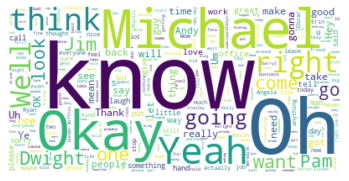

In [103]:
# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")